# Домашнее задание по статистике

Выполнил: Андрей Зайцев.

Для удобства, все комментарии от преподавателя оставил в исходном виде и не удалял.

Во первых, продублирую сюда правила оформления кода:
* Весь код в IPython Notebook
* Импорты библиотек в самом начале
* Все cell-ы должны запускаться по порядку
* Комментарии ключевых действий
* Графики с подписанными осями, легендами (если надо) и выводами
* Основные выводы в отдельных cell-ах в markdown
* Без дуплицирования больших кусков кода

Для того, чтобы cell предназначался для ввода текста, а не для написания кода, вам требуется в выпадающем меню на панели управления `Code` изменить на `Markdown` (можно также выделить cell синим цветом и нажать `M`).

Прошу заметить, что в этом ноутбуке мы можете спокойно оформлять формулы. Например, $\bar{y} = \frac{1}{n}\sum_{i=1}^n \hat{x}_i$ или с выносом на новую строку:
$$
    \bar{y} = \frac{1}{n}\sum_{i=1}^n \hat{x}_i
$$
для этого требуется внутри \$ \$ (или \$\$ \$\$) написать формулу, используя синтаксис $\LaTeX$

Перейдем к заданиям

In [221]:
import pandas as pd
import numpy as np
import scipy.stats as st
import seaborn as sns


import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

%matplotlib inline

# <<<Все import-ы библиотек здесь>>>

# Задание 1

## Описательный анализ исходных данных (Exploratory Data Analysis, EDA)

Прежде чем применять методы дисперсионного анализа или строить модели необходимо познакомиться с исходными данными для того, чтобы представлять о чем данные, насколько они заполнены, как сильно взаимосвязаны и, наконец, выбрать наиболее подходящий метод.

Проведите EDA. Для этого требуется:
* подсчитать и визуализировать описательные статистики
* дополнить пропуски в данных, если необходимо
* найти и удалить выбросы
* рассмотреть взаимную корреляцию

** Данные в файле `HW_task1_data.tsv`**

### Описание данных
```Data were collected from the 25 top liberal arts colleges and the 25 top research universities. There are 50 cases on 8 variables.
Number of cases: 50
School         : Contains the name of each school
School_Type    : Coded 'LibArts' for liberal arts and 'Univ' for university
SAT            : Median combined Math and Verbal SAT score of students
Acceptance     : % of applicants accepted
$/Student      : Money spent per student in dollars
Top 10%        : % of students in the top 10% of their h.s. graduating class
%PhD           : % of faculty at the institution that have PhD degrees
Grad%          : % of students at institution who eventually graduate
```

In [222]:
df = pd.read_csv('./data/HW1_task1_data.tsv', sep='\t')
df.head()

,School,School_Type,SAT,Acceptance,$/Student,Top 10%,%PhD,Grad%
0,Amherst,Lib Arts,1315,22,26636,85,81,93
1,Swarthmore,Lib Arts,1310,24,27487,78,93,88
2,Williams,Lib Arts,1336,28,23772,86,90,93
3,Bowdoin,Lib Arts,1300,24,25703,78,95,90
4,Wellesley,Lib Arts,1250,49,27879,76,91,86


Перед началом каких-либо действий над данными, выведем базовую информацию по таблице:

In [223]:
df.info()

df.count() / df.shape[0]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 8 columns):
School         50 non-null object
School_Type    50 non-null object
SAT            50 non-null int64
Acceptance     50 non-null int64
$/Student      50 non-null int64
Top 10%        50 non-null int64
%PhD           50 non-null int64
Grad%          50 non-null int64
dtypes: int64(6), object(2)
memory usage: 3.2+ KB


School         1.0
School_Type    1.0
SAT            1.0
Acceptance     1.0
$/Student      1.0
Top 10%        1.0
%PhD           1.0
Grad%          1.0
dtype: float64

Как видно из результатов, в таблице 50 записей и 8 столбцов, все столбцы "полные". Данные содержат 6 столбцов типа int64 и 2 столбца с текстовыми значениями, а именно название и тип учебного учереждения.

Пусть, целью "разведочного" исследования данных станет поведение величины **Grad%**. Эта величина обозначает процент студентов, которые в конце концов закончили обучение.
Выведем точечные оценки и посмотрим как она распределена:

In [224]:
df['Grad%'].describe()

count    50.000000
mean     83.480000
std       7.557237
min      61.000000
25%      77.250000
50%      85.500000
75%      89.000000
max      95.000000
Name: Grad%, dtype: float64

E:\Python\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


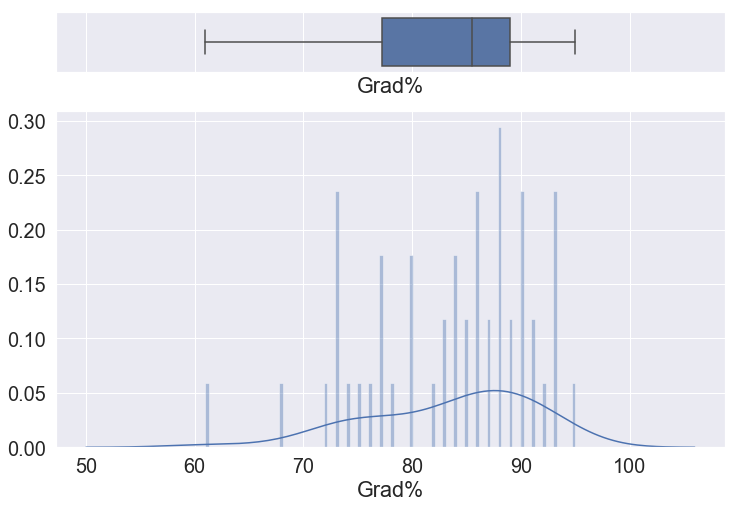

In [225]:
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)}, figsize=(12, 8))
 
# Add a graph in each part
sns.boxplot(df['Grad%'], ax=ax_box)
sns.distplot(df['Grad%'], ax=ax_hist, bins=100, hist_kws={'alpha': 0.4});

Из графика видно, что размещение смещено влево, а также используя boxplot, можно сказать о том, что выбросы отсутствуют.

Проверим распределение величины на нормальность. Проверим следующую гипотезу:

H0:  Grad распределена нормально

Но перед этим выделим все численные столбцы

In [226]:
df_num = df.select_dtypes(include=['int64'])
st.normaltest(df_num['Grad%'])

NormaltestResult(statistic=5.178927099511806, pvalue=0.07506029540066438)

Так как $\text{p-value} > 0.05$, то при уровне значимости $\alpha = 0.05$ мы не можем отвергнуть гипотезу, о том, что величина распределена нормально.

Дополнительно применим тест Шапиро-Уилка проверки на нормальность:

In [227]:
st.shapiro(df_num['Grad%'])

(0.9393238425254822, 0.012669013813138008)

Здесь $\text{p-value} < 0.05$, то при уровне значимости $\alpha = 0.05$ мы можем отвергнуть гипотезу, о том, что величина распределена нормально.

Исследуем распределение, выделенных ранее, численных столбцов.

In [228]:
df_num.head()

,SAT,Acceptance,$/Student,Top 10%,%PhD,Grad%
0,1315,22,26636,85,81,93
1,1310,24,27487,78,93,88
2,1336,28,23772,86,90,93
3,1300,24,25703,78,95,90
4,1250,49,27879,76,91,86


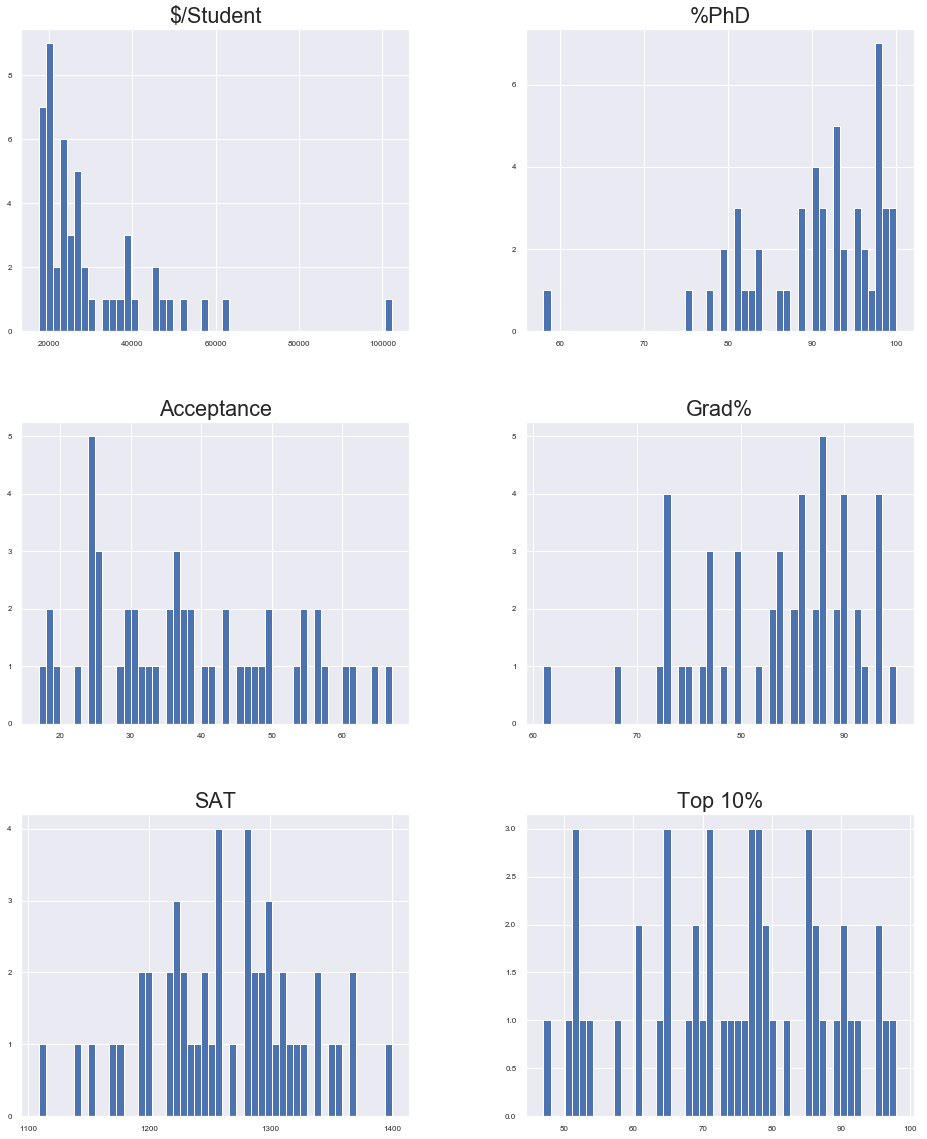

In [229]:
df_num.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8);

Из графиков можно сказать, что SAT, TOP 10% а также $Student распределены схожим с Grad образом.
Для оценки взаимосвязей исследуем корреляцию величин различными методамис Grad.

In [230]:
df_num_corr = df_num.corr()['Grad%'][:-1] # -1 because the latest row is Grad%
most_features_list = df_num_corr[abs(df_num_corr) > 0].sort_values(ascending=False)
print("There is {} correlated values with Grad%:\n{}".format(len(most_features_list), most_features_list))

There is 5 correlated values with Grad%:
SAT           0.569126
Top 10%       0.161335
$/Student     0.051055
%PhD         -0.055403
Acceptance   -0.562211
Name: Grad%, dtype: float64


In [231]:
top_features_list = pd.DataFrame()
for correlation_function in [st.pearsonr, st.spearmanr, st.kendalltau]:
            correlations = pd.Series(
                [correlation_function(df_num[column], df_num['Grad%'])[0] for column in df_num.columns],
                index=df_num.columns
            ).sort_values(ascending=False)
            top_features_list[correlation_function.__name__] = correlations.index[1:11]
print (top_features_list)

     pearsonr   spearmanr  kendalltau
0         SAT         SAT         SAT
1     Top 10%     Top 10%     Top 10%
2   $/Student   $/Student   $/Student
3        %PhD        %PhD        %PhD
4  Acceptance  Acceptance  Acceptance


Списки коррелированных величин не отличаются.
Также дополнительно построим pairplot'ы, для дополнительной проверки.

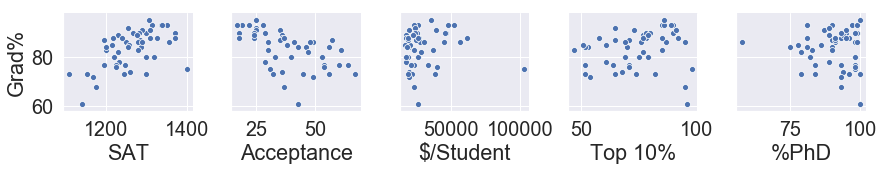

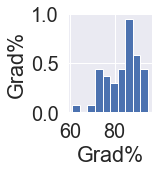

In [232]:
for i in range(0, len(df_num.columns), 5):
    sns.pairplot(data=df_num,
                 x_vars=df_num.columns[i:i+5],
                 y_vars=['Grad%'])

Дополнительных зависемостей обнаружено не было.

Помимо этого оценим влияние категориальных признаков на Grad.

In [233]:
categorical_columns = list(set(df.columns) - set(df._get_numeric_data().columns))

columns_n_unique = df_num.nunique()
categorical_columns = categorical_columns + columns_n_unique[columns_n_unique <= 5].index.tolist()

df_cat = df[['Grad%']].copy()
for column in categorical_columns:
    df_cat[column] = df[column].astype('category')

df_cat.head()

,Grad%,School_Type,School
0,93,Lib Arts,Amherst
1,88,Lib Arts,Swarthmore
2,93,Lib Arts,Williams
3,90,Lib Arts,Bowdoin
4,86,Lib Arts,Wellesley


Оценим изменение величины Grad, в зависимости от типа учебного заведения.

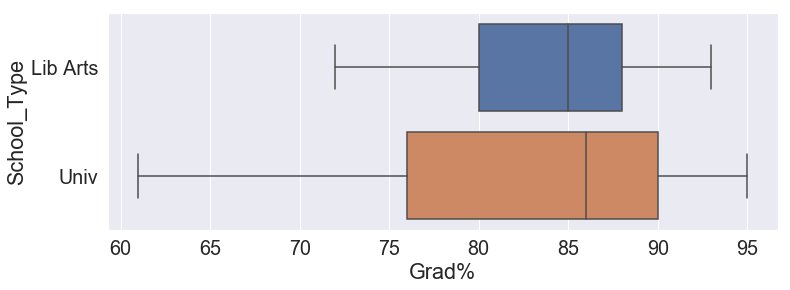

In [234]:
fig = plt.figure(figsize=(12, 4))
sns.boxplot(y='School_Type', x='Grad%', data=df_cat);

Из графика можно сделать вывод, что в среднем для университетов показатель Grad выше чем для заведений Liberal Arts, но вместе с этим и сильнее разброс величины. На это может влиять например сложность обучения в каком-либо конкретном учебном заведении. Например для: 

In [235]:
df_cat[df_cat['Grad%'] == 61]

,Grad%,School_Type,School
41,61,Univ,UCLA


Используя большее количество информации, можно связать позицию университета в топе публичных школ, процент завершившив обучение и сложность обучения.
https://www.usnews.com/best-colleges/rankings/national-universities/top-public


Заключение.
С целевой величиной Grad% сильнее всего коррелирует SAT (а именно, Среднее количество баллов по математике и вербальной шкале SAT). Что может говорить о том, что более "умные" студенты имеют больший успех в успешном завершении обучения.

Также было обнаружено, что средний процент студентов, закончивших университет больше, чем заведения library arts(естественные науки). При этом показатель процента закончивших университет имеет больший разброс чем library arts.

В дополнение, при проверке гипотезы о нормальном распределении величины Grad% несколькими способами - были получены разные результаты. Но основываясь на том, что тест Шапиро-Уилка более мощный, отвергаем гипотезу о том, что величина распределена нормально.

Для дальнейшего изучения можно применить ANOVA для исследования влияния сразу нескольких факторов на итоговый процент выпустившихся студентов.

# Задание 2

## Стратификация

Начнем со следующего примера:

Предположим, что нам нужно оценить среднее число голосов, поданных за каждого кандидата на выборах. Предположим, что в стране 3 города: в городе А живёт 1 миллион заводских рабочих, в городе Б живёт 2 миллиона офисных работников, а в городе В живёт 3 миллиона пенсионеров. Мы можем выбрать получение случайной выборки размером в 60 голосов со всей популяции, но есть некоторая вероятность, что случайная выборка окажется плохо сбалансирована по этим городам и, следовательно, будет необъективна и малополезна («средняя температура по больнице»), вызывая значительную погрешность в оценке. Взамен этого, если мы выберем использовать простую случайную выборку в 10, 20 и 30 голосов из городов А, Б и В соответственно, мы можем получить меньшую погрешность в оценке при том же общем размере выборки. Такой прием называется стратификацией.

Подробнее о стратификации [здесь](https://compscicenter.ru/media/slides/math_stat_2017_spring/2017_02_27_math_stat_2017_spring_qWLJs8i.pdf)

### Задача

Предположим, что генеральная совокупность - смесь 3х нормально распределенных СВ. Иными словами, генеральную совокупность можно разбить на 3 страты.
$$
    F(X) = a_1 F(X_1) + a_2 F(X_2) + a_3 F(X_3)
$$

** Требуется:**
* Вывести формулы и подсчитать точечные оценки математического ожидания и дисперсии для среднего значения подвыборок, образованных разными способами:
    * случайный выбор из всей генеральной совокупности
    * случайный выбор из страт пропорционально долям
    * случайный выбор согласно оптимальному разбиению на подсэмплы

Оценки вычисляются из результатов повторения эксперимента 1000 раз

Эксперименты провести для 3ех разных случаев:
* все страты имеют одинаковые мат. ожидания и дисперсии
* страты имеют разные мат.ожидания, но одинаковые дисперсии
* страты имеют разные и мат. ожидания и дисперсии.

Также провести эксперимент для разных размеров генеральной совокупности: 40 и 500. Параметры нормальных распределений, доли и размер подвыборки задайте самостоятельно

Основные формулы были взяты из pdf'a, указанного в задании.
Для оптимального семплирования (Неймана) использовалась формула:
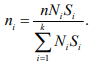

In [236]:
class Experiment:

    def __init__(self, means, stds, random_state=1):
        """Инициализирует наш эксперимент и сохраняем заданные распределения
        
        :param means: Список матожиданий для нормальных распределний
        :param stds: Список стандартных отклонений для нормальных распределний
        :param random_state: Параметр фиксирующий случайность. Нужен для того, чтобы при воспроизведении
        эксперимента повторно с теми же входными параметрами, результаты оставались такими же
        """
        self.strats = [st.norm(mean, std) for mean, std in zip(means, stds)]
    
    def sample(self, sizes):
        """Создает выборку генеральной совокупности
        
        :param sizes: Список с размерами выборок соответсвующих им нормальных распределений
        """
        self.strats_samples = [rv.rvs(size) for rv, size in zip(self.strats, sizes)]
        self.general_samples = np.hstack(self.strats_samples)        
        self.N = self.general_samples.shape[0]
        #print (self.strats_samples)
        
    def random_subsampling(self, size):
        """Создает случайную подвыборку из генеральной совокупности
        
        :param sizes: размер подвыборки
        """
        # ok, let's go, replace = TRUE, эл-ты могут повторяться, то дисперсия sigma^2/n
        # или (N-1)/(Nn) * sigma^2
        # вспомогательная функция
        def sub_gen_variance (x, x_average):
            variance = 0
            for i in x:
                variance += (i - x_average) **2
            
            return variance/(len(x)-1) 
            
        self.rand_subsample = np.random.choice(self.general_samples, size, replace=True)
        
        
        self.X_est = sum(self.rand_subsample) / (size) 
        s = sub_gen_variance(self.rand_subsample, self.X_est)
        self.V_est = s  * ((self.N - size) / (self.N*size))
        
        return self.X_est, self.V_est, self.rand_subsample
    
 
    def proportional_subsampling(self, size):
        """Создает подвыборку с кол-вом элементов, пропроциональным долям страт
        
        :param sizes: размер подвыборки
        """
        # вспомогательная функция
        def sub_gen_variance (x, x_average, a):
            if (a == 1):
                return 0
            else:
                variance = 0
                for i in x:
                    variance += (i - x_average) **2
                return variance/(a-1)   
        
    
        # вычислим доли страт и соответствующий им объем выборки
        # Ni - размер исходной части в ген совокупностьи
        N1 = self.strats_samples[0][:].shape[0]
        N2 = self.strats_samples[1][:].shape[0]
        N3 = self.strats_samples[2][:].shape[0]
        #wk - пропорция, относительно ген совокупности
        w1 = N1/self.N
        w2 = N2/self.N
        w3 = N3/self.N
        
        # размер страты
        a1 = int(round(w1,1)*size)
        a2 = int(round(w2,1)*size)
        a3 = int(round(w3,1)*size)

        # страты
        h1 = np.random.choice(self.strats_samples[0][:], a1, replace=True)
        h2 = np.random.choice(self.strats_samples[1][:], a2, replace=True)
        h3 = np.random.choice(self.strats_samples[2][:], a3, replace=True)
        temp_strat_subsample = [
                h1,
                h2,
                h3                
                ]
        # итоговая страта
        self.strat_prop_subsample = np.hstack(temp_strat_subsample)

        
        # оценка мат ожидания для среднего значения подвыборок
        avg_ss_1 = sum(h1) / a1
        avg_ss_2 = sum(h2) / a2
        avg_ss_3 = sum(h3) / a3
        #avg = sum(self.strat_prop_subsample)/self.strat_prop_subsample.shape[0] 
        #print (avg)
        self.X_est = (w1*avg_ss_1 + w2*avg_ss_2 + w3*avg_ss_3)
        
        # оценка дисперсии для среднего значения подвыборок
        u1 = (w1 ** 2) / (a1)
        u2 = (w2 ** 2) / (a2)
        u3 = (w3 ** 2) / (a3)
        s1_h = sub_gen_variance(h1, avg_ss_1, a1)
        s2_h = sub_gen_variance(h2, avg_ss_2, a2)
        s3_h = sub_gen_variance(h3, avg_ss_3, a3)
        self.V_est = (u1*s1_h + u2*s2_h + u3*s3_h)
        #print ("EST for subsample values are: " + str(self.X_est ) +" " + str(self.V_est))
        return self.X_est, self.V_est, self.strat_prop_subsample
        
        
        
    
    def optimal_subsampling(self, size):
        """Создает подвыборку с оптимальным кол-вом элементов относительно страт
        
        :param sizes: размер подвыборки
        """
        # let's count
        # вспомогательная функция
        def sub_gen_variance (x, x_average, a):
            if (a == 1):
                return 0
            else:
                variance = 0
                for i in x:
                    variance += (i - x_average) **2
                return variance/(a-1)   
        
        
        # std для вычисления размеров страт
        s1 = np.std(self.strats_samples[0][:])
        s2 = np.std(self.strats_samples[1][:])
        s3 = np.std(self.strats_samples[2][:])
        # кол-во элетментов пропорции
        N1 = self.strats_samples[0][:].shape[0]
        N2 = self.strats_samples[1][:].shape[0]
        N3 = self.strats_samples[2][:].shape[0]
        # знаменатель для вычисления кол-ва элементов в страте
        w_s = s1 * N1 + s2 * N2 + s3 * N3
        
        #wk - пропорция, относительно ген совокупности
        w1 = N1/self.N
        w2 = N2/self.N
        w3 = N3/self.N
        
        # размеры страты
        n1 = int( round (size * s1 * N1 / w_s))
        n2 = int( round (size * s2 * N2 / w_s))
        n3 = int( round (size * s3 * N3 / w_s))
        
        #print (n1,n2,n3)
        h1 = np.random.choice(self.strats_samples[0][:], n1, replace=True)
        h2 = np.random.choice(self.strats_samples[1][:], n2, replace=True)
        h3 = np.random.choice(self.strats_samples[2][:], n3, replace=True)
        
        temp_strat_subsample = [
                h1,
                h2,
                h3                
                ]
        self.strat_opt_subsample = np.hstack(temp_strat_subsample)
        
        # оценка мат ожидания для среднего значения подвыборок
        avg_ss_1 = sum(h1) / n1
        avg_ss_2 = sum(h2) / n2
        avg_ss_3 = sum(h3) / n3
        #avg = (avg_ss_1 + avg_ss_2 + avg_ss_3)
        #print (avg)
        
        self.X_est = (w1*avg_ss_1 + w2*avg_ss_2 + w3*avg_ss_3)
        
        # оценка дисперсии для среднего значения подвыборок
        u1 = (w1 ** 2) / (n1)
        u2 = (w2 ** 2) / (n2)
        u3 = (w3 ** 2) / (n3)
        s1_h = sub_gen_variance(h1, avg_ss_1, n1)
        s2_h = sub_gen_variance(h2, avg_ss_2, n2)
        s3_h = sub_gen_variance(h3, avg_ss_3, n3)
        self.V_est = (u1*s1_h + u2*s2_h + u3*s3_h)
        #print ("EST for subsample values are: " + str(self.X_est ) +" " + str(self.V_est))
        
        return self.X_est, self.V_est, self.strat_opt_subsample
       
        
    def test(self, subsampling_method , size):
        if (subsampling_method == 'random_subsampling'):
            test = self.random_subsampling(size)
            print (test)
        
    def run_experiments(self, subsampling_method, size_n, n_experiments=1000):
        #Проводит серию экпериментов и сохраняет результаты
        
        #:param subsampling_method: метод для создания подвыборки
        #:param n_experiments: кол-во запусков эксперимента
        i = n_experiments
        mean1, mean2,mean3, var1,var2,var3, mean_exp1,var_exp1  = 0,0,0,0,0,0,0,0
        mean_exp2,var_exp2,mean_exp3,var_exp3 = 0,0,0,0
        while (i > 0):
            test1 = self.random_subsampling(size_n)
            test2 = self.proportional_subsampling(size_n)
            test3 = self.optimal_subsampling(size_n)
            
            mean_exp1 += np.mean(test1[2])
            var_exp1 += np.var(test1[2]) / size_n
            
            mean_exp2 += np.mean(test2[2])
            var_exp2 += np.var(test2[2]) / size_n
            
            mean_exp3 += np.mean(test3[2])
            var_exp3 += np.var(test3[2]) / size_n
            
            mean1 += test1[0]
            var1  += test1[1]
            mean2 += test2[0]
            var2  += test2[1]
            mean3 += test3[0]
            var3  += test3[1]
            
            i -= 1
        gen_mean = np.mean (self.general_samples)
        mean_rs_exp = mean_exp1 /n_experiments
        var_rs_exp = var_exp1 /n_experiments
        mean_rs, var_rs = mean1/n_experiments, var1/n_experiments
        
        mean_ps_exp = mean_exp2 /n_experiments
        var_ps_exp = var_exp2 /n_experiments
        mean_ps, var_ps = mean2/n_experiments, var2/n_experiments
        
        mean_os_exp = mean_exp3 /n_experiments
        var_os_exp = var_exp3 /n_experiments
        mean_os, var_os = mean3/n_experiments, var3/n_experiments
        
        print ("General mu")
        print (gen_mean)
        print ("Exprected value and variance for mean, random sampling")
        print (mean_rs_exp, var_rs_exp) 
        print ("Estimated value and variance for mean, random sampling")
        print (mean_rs, var_rs)
        print ("\t")
        print ("Exprected value and variance for mean, proportial sampling")
        print (mean_ps_exp, var_ps_exp) 
        print ("Estimated value and variance for mean, proportial sampling")
        print (mean_ps, var_ps)
        print ("\t")
        print ("Exprected value and variance for mean, optimal sampling")
        print (mean_os_exp, var_os_exp)
        print ("Estimated value and variance for mean, optimal sampling")
        print (mean_os, var_os)
        print ("\t")
        results = [(mean_rs, var_rs) , (mean_ps, var_ps) , (mean_os, var_os)]
        
        return results

  case 1, same mu and same sigma's 
General mu
-0.07410997769007678
Exprected value and variance for mean, random sampling
-0.07619203962066817 0.098901781833171
Estimated value and variance for mean, random sampling
-0.07619203962066819 0.08241815152764245
	
Exprected value and variance for mean, proportial sampling
-0.07736448033432847 0.09866926621963214
Estimated value and variance for mean, proportial sampling
-0.07190203947213544 0.09192337249800814
	
Exprected value and variance for mean, optimal sampling
-0.09969072536411162 0.09911736483470172
Estimated value and variance for mean, optimal sampling
-0.07951419756423644 0.10234168323192996
	


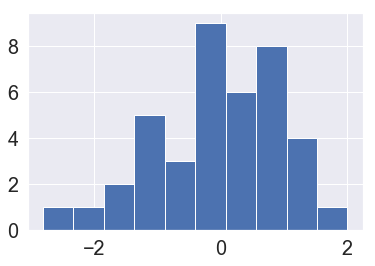

  case 2, different mu and same sigma's 
General mu
2.938686935579489
Exprected value and variance for mean, random sampling
2.93972195825697 0.41021480341743394
Estimated value and variance for mean, random sampling
2.9397219582569702 0.3418456695145287
	
Exprected value and variance for mean, proportial sampling
2.877265126269385 0.4232221533867964
Estimated value and variance for mean, proportial sampling
2.935357911661882 0.09221730373170853
	
Exprected value and variance for mean, optimal sampling
2.8670268115969058 0.43010032754822497
Estimated value and variance for mean, optimal sampling
2.9262553864744936 0.09122249431661325
	


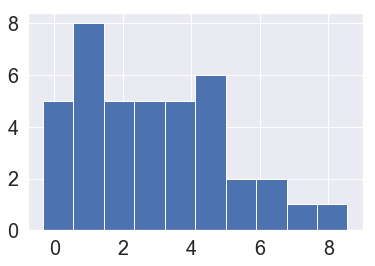

  case 3, different mu and sigma's 
General mu
2.210660946462872
Exprected value and variance for mean, random sampling
2.1874263197433055 0.4382564060499122
Estimated value and variance for mean, random sampling
2.1874263197433055 0.36521367170826
	
Exprected value and variance for mean, proportial sampling
2.1325791127112885 0.438055484127043
Estimated value and variance for mean, proportial sampling
2.21551942513137 0.20181138288873604
	
Exprected value and variance for mean, optimal sampling
2.483738648554436 0.4672460327549492
Estimated value and variance for mean, optimal sampling
2.213186877185927 0.17779422721921345
	


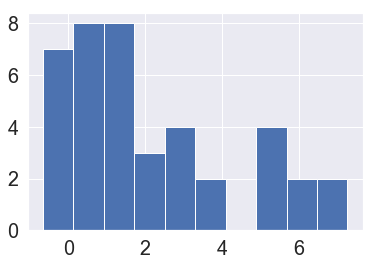

  case 4, same mu and same sigma's , 100 sample size and 500 general sample 
General mu
-0.17148295234039904
Exprected value and variance for mean, random sampling
-0.17914567253757954 0.010692268634600243
Estimated value and variance for mean, random sampling
-0.17914567253757957 0.008640217078464844
	
Exprected value and variance for mean, proportial sampling
-0.16760386169863908 0.010879617583067831
Estimated value and variance for mean, proportial sampling
-0.16827908627931806 0.010840016397231303
	
Exprected value and variance for mean, optimal sampling
-0.175307639521073 0.01086622118584156
Estimated value and variance for mean, optimal sampling
-0.17564082143029744 0.010835500452338496
	


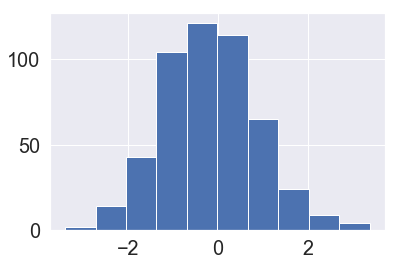

  case 5, different mu and same sigma's, 100 sample size and 500 general sample 
General mu
2.7662690888556973
Exprected value and variance for mean, random sampling
2.774698022401654 0.04099729805402423
Estimated value and variance for mean, random sampling
2.7746980224016538 0.03312912974062566
	
Exprected value and variance for mean, proportial sampling
2.732274952499631 0.03977584493763609
Estimated value and variance for mean, proportial sampling
2.76664902042568 0.009923154310849109
	
Exprected value and variance for mean, optimal sampling
2.779379825966997 0.04065305212413924
Estimated value and variance for mean, optimal sampling
2.767029059799331 0.009980773663283274
	


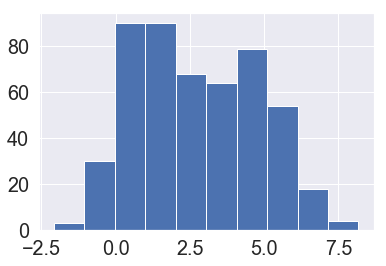

 case 6, different mu and sigma's, 100 sample size and 500 general sample 
General mu
2.6976002371886034
Exprected value and variance for mean, random sampling
2.7093986958529546 0.07578713533156835
Estimated value and variance for mean, random sampling
2.709398695852954 0.06124212956086332
	
Exprected value and variance for mean, proportial sampling
2.6525247741722935 0.07413067041355835
Estimated value and variance for mean, proportial sampling
2.6997449857632403 0.04021324347157591
	
Exprected value and variance for mean, optimal sampling
3.3600490544995463 0.08429477320886003
Estimated value and variance for mean, optimal sampling
2.699713758291036 0.03345208476949584
	


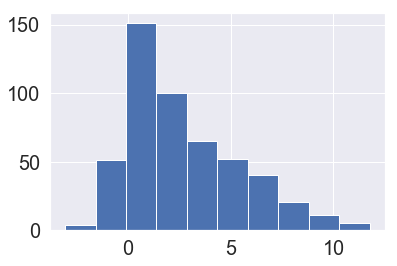

In [237]:
print ("  case 1, same mu and same sigma's ")
experiment1 = Experiment([0, 0, 0], [1, 1, 1])
experiment1.sample([20, 5, 15])
a = experiment1.run_experiments("random_subsampling", 10)
plt.hist(experiment1.general_samples);
plt.show()

print ("  case 2, different mu and same sigma's ")
experiment2 = Experiment([1, 6, 4], [1, 1, 1])
experiment2.sample([20, 5, 15])
b = experiment2.run_experiments("random_subsampling", 10)
plt.hist(experiment2.general_samples);
plt.show()

print ("  case 3, different mu and sigma's ")
experiment3 = Experiment([1, 6, 4], [1, 2, 3])
experiment3.sample([20, 5, 15])
c = experiment3.run_experiments("random_subsampling", 10)
plt.hist(experiment3.general_samples);
plt.show()

print ("  case 4, same mu and same sigma's , 100 sample size and 500 general sample ")
experiment4 = Experiment([0, 0, 0], [1, 1, 1])
experiment4.sample([250, 60, 190])
d = experiment4.run_experiments("random_subsampling", 100)
plt.hist(experiment4.general_samples);
plt.show()

print ("  case 5, different mu and same sigma's, 100 sample size and 500 general sample ")
experiment5 = Experiment([1, 6, 4], [1, 1, 1])
experiment5.sample([250, 60, 190])
e = experiment5.run_experiments("random_subsampling", 100)
plt.hist(experiment5.general_samples);
plt.show()


print (" case 6, different mu and sigma's, 100 sample size and 500 general sample ")
experiment6 = Experiment([1, 6, 4], [1, 2, 3])
experiment6.sample([250, 60, 190])
f = experiment6.run_experiments("random_subsampling", 100)
plt.hist(experiment6.general_samples);
plt.show()


Заключение.
Была проведена экспериментов, с по результатам которых, можно судить о том, что точечные оценки достаточно хорошо приближают мат ожидание генеральной совокупности.
С дисперсией результаты разнятся, это должно быть связано с различными долями смесей в исходной совокупности, а также с размерами долей.

Также хочется отметить, что для более детального понимания задания следует обратить увеличить количество экспериментов, использовать разные доли смеси и удостовериться в корректности использованных формул.

# Задание 3

## Последовательный критерий Вальда (критерий [SPRT](https://en.wikipedia.org/wiki/Sequential_probability_ratio_test))

[Видео с объяснением](https://www.youtube.com/watch?v=4NYbTUIkBbU&index=4&list=PLlb7e2G7aSpRG_Ve6kuxc9Biuwyf42kJx) (начало 1:06:20) 

### Задача 
* Создайте синтетические данные полученные путем смешивания 2 выборок из нормально распределеных СВ с разными матожиданиями, но одинаковыми дисперсиями
* Примените к сгенерированным данным последовательный критерий Вальда силы $(\alpha, \beta)$ (критерий Вальда должен быть реализован самостоятельно). Для этого:
    * Задайте нулевую и альтернативную гипотезы о равенствах матожиданий конкретным величинам
    * Задайте $\alpha, \beta$
    * Выпишите формулы аппроксимации границы
    * Провести эксперимент
    * Результат эксперимента отобразить на графике
* Проанализируйте поведение критерия при разных долях компонент в смеси
* Какой объем выборок потребовался в каждом случае?
* Выпишите нижнюю оценку для среднего числа наблюдений при заданных $(\alpha, \beta)$ в случае справедливости нулевой и альтернативной гипотез

Создадим искусственную выборку путем смешивания 2х выборок СВ с разными мат ожиданиями и одинаковыми дисперсиями.

In [248]:
s1 = np.random.normal(0, 1, 10)
s2 = np.random.normal(2, 1, 10)
temp_strat_subsample = [
                s1,
                s1,                
                ]
gen_samples = np.hstack(temp_strat_subsample)
print (gen_samples)

[ 1.83205854 -0.83168047 -0.88992576 -0.39167428  1.24143333 -1.05563759
 -0.92989193 -0.02608699 -1.16685753 -2.13901481  1.83205854 -0.83168047
 -0.88992576 -0.39167428  1.24143333 -1.05563759 -0.92989193 -0.02608699
 -1.16685753 -2.13901481]


Зададим начальные параметры и нулевую с альтернативной гипотезы:

In [249]:
alpha = 0.05
beta=0.2
h0=0
h1=1
variance = 1

Критические значения upperCritical и lowerCritical задаются по формуле:
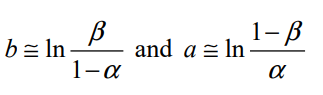

In [250]:
cum_values = np.cumsum(gen_samples) # считаем Zi как кумулятивную сумму 

upperCritical = np.log((1 - beta)/alpha)
print ("c1: ", upperCritical)
lowerCritical = np.log(beta/(1 - alpha))
print ("c0: ",lowerCritical)

# инициализируем необходимые переменные для построения границ
num_observation = len(gen_samples)
seq_observation = np.array(range(1, num_observation + 1))
# инициализируем необходимые переменные для построения графика
x = np.array(range(0, num_observation + 2))
yl = yu = np.ones(num_observation + 2)
decision = None

c1:  2.772588722239781
c0:  -1.5581446180465497


Аппроксимируем границы для всех элементов:

In [251]:
b = (h1 + h0)/2
lowerIntercept = lowerCritical * variance / (h1 - h0)
upperIntercept = upperCritical * variance / (h1 - h0)
# апроксимируем нижнюю и верхнюю границу с использованием коээфициента наклона и приращения
lowerBoundary = seq_observation * b + lowerIntercept
upperBoundary = seq_observation * b + upperIntercept

# вычисляем значения линий пересечения для графиков
yl = x * b + lowerIntercept
yu = x * b + upperIntercept

Производим сравнение поочередно, произошел ли выход за верхнюю и нижнюю границу, в случае выхода и принятия гипотезы остановка цикла.

In [252]:
for i in range(num_observation):
    if cum_values[i] > upperBoundary[i]:
        decision = "Reject"
        print (cum_values[i], upperBoundary[i])
        i += 1
        #print (decision)
        break
    elif cum_values[i] < lowerBoundary[i]:
        decision = "Accept"
        print (cum_values[i], lowerBoundary[i])
        i += 1
        #print (decision)
        break
    else:
        decision = "Continue"
        #print (decision)

-0.2812219653012833 0.4418553819534503


Выводим границы, и результат, на каком шаге произошло принятие гипотезы.
Для выборки смешанной из 2х выборок СВ с разными мат ожиданиями и одинаковыми дисперсиями произошло принятие нулевой гипотезы на шаге:

In [253]:
nobs = 50
print("Decision: " + decision + " on " + str(i) + " step")
output_dict = {'values': cum_values, 'lower': lowerBoundary, 'upper': upperBoundary}
output_df = pd.DataFrame(output_dict, columns=['values', 'lower', 'upper'], index=seq_observation)
output_df.index.name = "n"
print(output_df.round(3).iloc[-nobs:])

Decision: Accept on 4 step
    values  lower   upper
n                        
1    1.832 -1.058   3.273
2    1.000 -0.558   3.773
3    0.110 -0.058   4.273
4   -0.281  0.442   4.773
5    0.960  0.942   5.273
6   -0.095  1.442   5.773
7   -1.025  1.942   6.273
8   -1.051  2.442   6.773
9   -2.218  2.942   7.273
10  -4.357  3.442   7.773
11  -2.525  3.942   8.273
12  -3.357  4.442   8.773
13  -4.247  4.942   9.273
14  -4.638  5.442   9.773
15  -3.397  5.942  10.273
16  -4.453  6.442  10.773
17  -5.383  6.942  11.273
18  -5.409  7.442  11.773
19  -6.576  7.942  12.273
20  -8.715  8.442  12.773


Построим график:

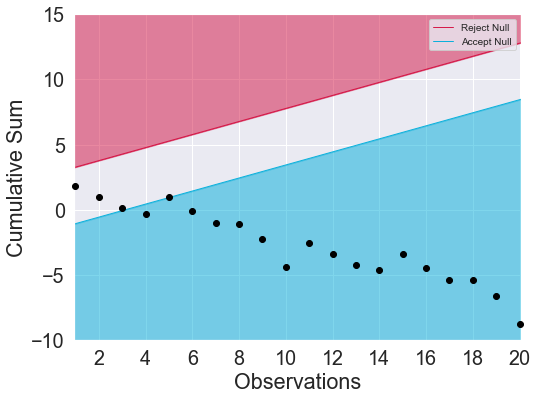

In [254]:
# plot the data
lowerBoundaryColor = "#00aedb" 
upperBoundaryColor = "#d41243"
continueColor = "#000000"

fig, ax = plt.subplots(figsize=(8, 6))
lower_line, = ax.plot(x, yl, color = lowerBoundaryColor, linewidth = 1, alpha = 0.95)
upper_line, = ax.plot(x, yu, color = upperBoundaryColor,  linewidth = 1,  alpha = 0.95)
ax.scatter(seq_observation, cum_values, color = "#000000", zorder = 1000, clip_on=False)
yticks, yticklabels = plt.yticks()
ymin = yticks[0]
ymax = yticks[-1]
ax.fill_between(x, yl, ymin, color = lowerBoundaryColor, alpha = 0.5)
ax.fill_between(x, yu, ymax, color = upperBoundaryColor, alpha = 0.5)
ax.xaxis.set_major_locator(ticker.MaxNLocator(integer = True))
xticks, xticklabels = plt.xticks()
xmin = 0.95
xmax = num_observation + 0.05 
plt.xlim(xmin, xmax)
plt.ylim(ymin, ymax)
plt.xlabel("Observations")
plt.ylabel("Cumulative Sum")
plt.legend(handles = [upper_line, lower_line], labels = ["Reject Null", "Accept Null"], fontsize = 10, loc = 1)
plt.show()  

Проанализируем поведение критерия при разных долях компонент в смеси.
Нулевые гипотезы остаются идентичными. H0 = 0, H1 = 1.

При распределении следующем распределении долей в смеси:

s1 = np.random.normal(1, 1, 5)

s2 = np.random.normal(7, 1, 15)

Получился следующий результат:
Decision: Reject on 8 step
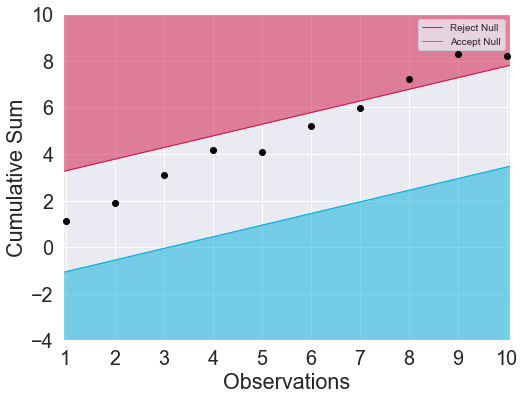

Но если изменить выборки следующим образом:

s1 = np.random.normal(7, 1, 5)

s2 = np.random.normal(1, 1, 15)

То альтернативная гипотеза принимается мгновенно:
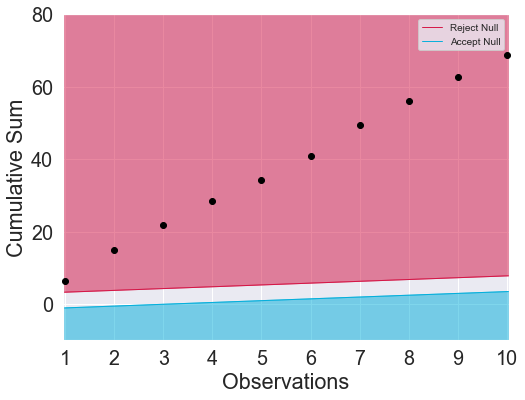

Проведем обратный тест, при котором объемы выборки и мат ожидания будут следующие:

s1 = np.random.normal(1, 1, 15)

s2 = np.random.normal(7, 1, 5)

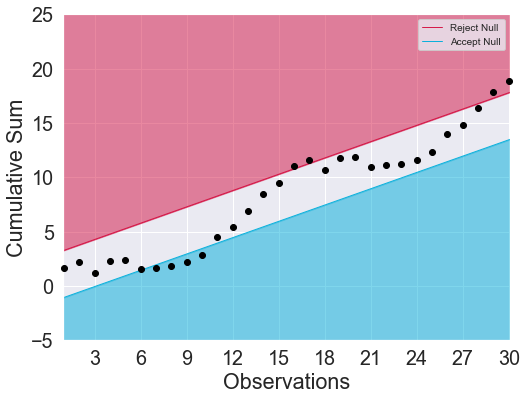

И

s1 = np.random.normal(7, 1, 15)

s2 = np.random.normal(1, 1, 5)

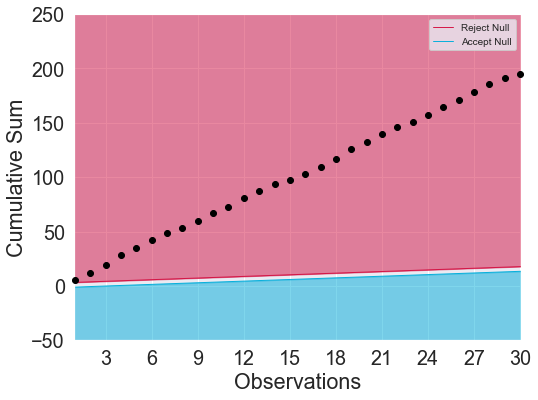

Какой объем выборок потребовался в каждом случае?
Для различных долей смесей и мат ожиданий может потребоваться выборки размером от 10 до 30 элементов.
При принятие решение происходит в зависимости от мат ожидания/объема выборки с 1 шага до 11 шага.

Заключение:
Как показали опыты на номер шага, влияет в большую очередь мат ожидание компонента смеси, затем объем выборки.
Наличии в одном компоненте смеси большего мат ожидания и объема выборки, имеет большее влияния на принятие нулевой или альтернативной гипотезы.

# Задание 4

## Корреляция:

### Задача 1
Используя [следующий критерий](http://statistica.ru/theory/znachimost-koeffitsienta-korrelyatsii-doveritelnyy-interval/), проверить, есть ли взаимосвязь между размером мозга интеллектом для совместной выборки мужчин и женщин, а также для каждой из выборок в отдельности.

** Данные в файле `HW1_task4_brain_data.tsv`**

Описание данных:
Взято с сайта:
https://www3.nd.edu/~busiforc/handouts/Data%20and%20Stories/correlation/Brain%20Size/brainsize.html

Variable Names:
1.Gender: Male or Female
2.FSIQ: Full Scale IQ scores based on the four Wechsler (1981) subtests
3.VIQ: Verbal IQ scores based on the four Wechsler (1981) subtests
4.PIQ: Performance IQ scores based on the four Wechsler (1981) subtests
5.Weight: body weight in pounds
6.Height: height in inches
7.MRI_Count: total pixel Count from the 18 MRI scans

Загрузим и оценим набор данных:

In [255]:
df = pd.read_table('./data/HW1_task4_brain_data.tsv',header=0)

print (df.head())

print ("Number of rows: %i" % df.shape[0])
print ("Number of columns: %i" % df.shape[1])


print (df.count() / df.shape[0])

   Gender  FSIQ  VIQ  PIQ Weight Height  MRI_Count
0  Female   133  132  124    118   64.5     816932
1    Male   140  150  124      �   72.5    1001121
2    Male   139  123  150    143   73.3    1038437
3    Male   133  129  128    172   68.8     965353
4  Female   137  132  134    147   65.0     951545
Number of rows: 40
Number of columns: 7
Gender       1.0
FSIQ         1.0
VIQ          1.0
PIQ          1.0
Weight       1.0
Height       1.0
MRI_Count    1.0
dtype: float64


Итого есть 7 столбцов и 40 строк, среди которых одна категориальная величини - пол, а остальные - числовые.

Используем коэффициент корреляции Пирсона для оценки взаимосвязи между величинами FSIQ, VIQ, PIQ и MRI_Count:
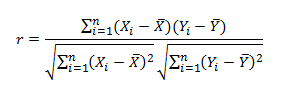


Статистическая проверка наличия корреляции между выборками:
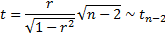

Для последующего анализа разделим исходную выборку на 2 части - мужчины и женщины:

In [256]:
df_m = df[df['Gender'] == 'Male']
df_m = df_m.reset_index(drop=True)

df_f = df[df['Gender'] == 'Female']
df_f = df_f.reset_index(drop=True)

Построим графики, для визуализации данных.

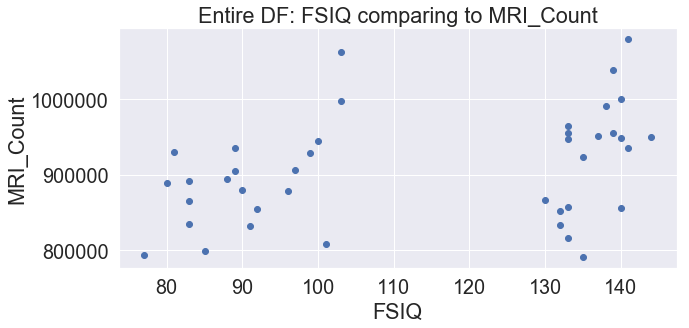

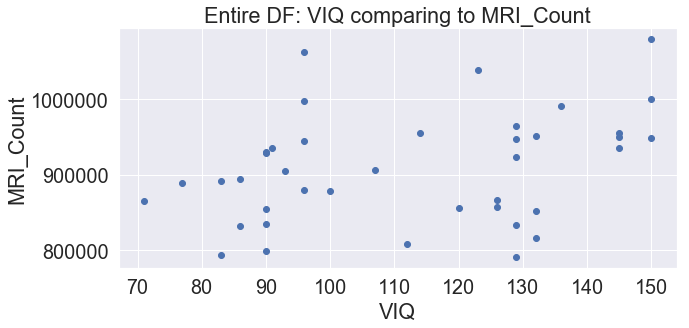

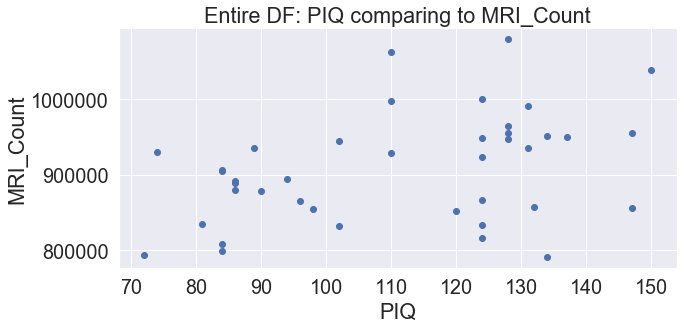

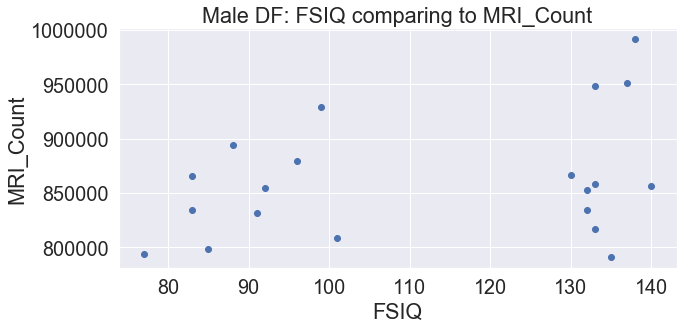

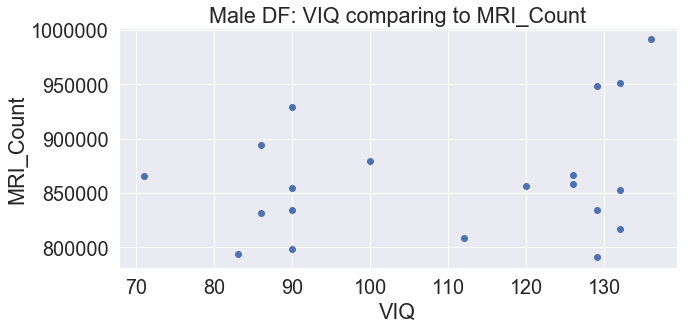

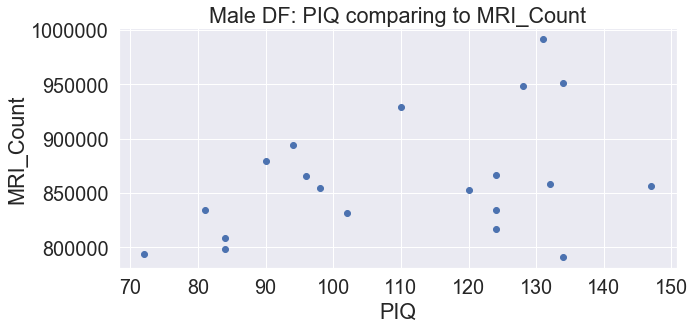

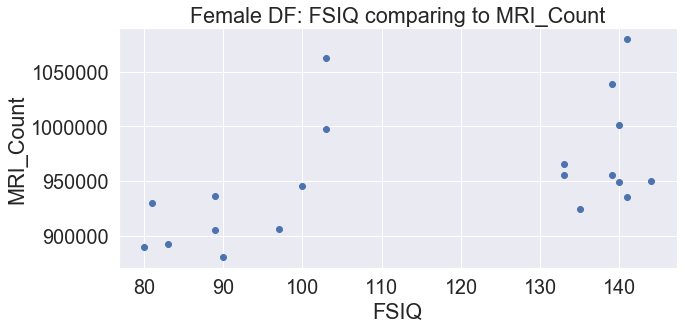

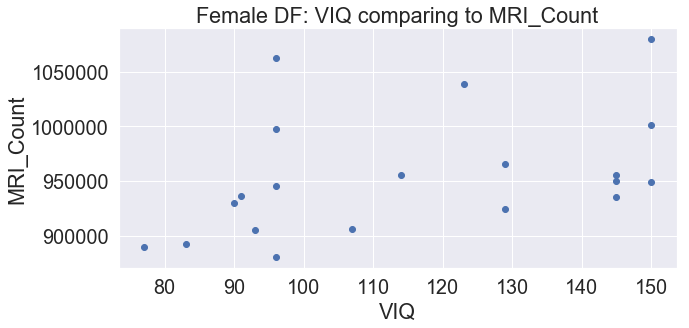

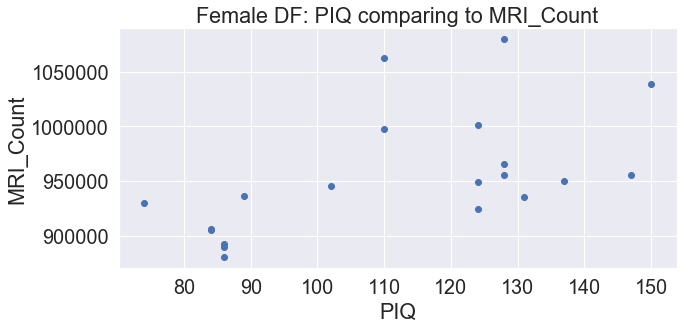

In [257]:
for i in range(3):
    plt.figure(figsize=(10,15))
    plt.subplot(3,1,i+1)
    plt.scatter(df.iloc[:,i+1],df['MRI_Count'])
    plt.title("Entire DF: " + list(df)[i+1] + " comparing to " + list(df)[6])
    plt.xlabel(list(df)[i+1])
    plt.ylabel(list(df)[6])

for i in range(3):
    plt.figure(figsize=(10,15))
    plt.subplot(3,1,i+1)
    plt.scatter(df_f.iloc[:,i+1],df_f['MRI_Count'])
    plt.title("Male DF: " + list(df_f)[i+1] + " comparing to " + list(df_f)[6])
    plt.xlabel(list(df_f)[i+1])
    plt.ylabel(list(df_f)[6])
    
for i in range(3):
    plt.figure(figsize=(10,15))
    plt.subplot(3,1,i+1)
    plt.scatter(df_m.iloc[:,i+1],df_m['MRI_Count'])
    plt.title("Female DF: " + list(df_m)[i+1] + " comparing to " + list(df_m)[6])
    plt.xlabel(list(df_m)[i+1])
    plt.ylabel(list(df_m)[6])


Далее, для облегчения вычислений реализуем функцию, которая будет считать значение коэффициента корреляции и значение t-статистики.

In [258]:
def corr_p (df, x, y):
    n = df.shape[0]
    # вычисление средних
    mean_X = sum(df[x])/n
    mean_Y = sum(df[y])/n
    # инициализация переменных числителя и знаменателя.
    upper_tail = 0
    lower_tail_x = 0
    lower_tail_y = 0
    for index, row in df.iterrows():
        upper_tail += (df[x].values[index]-mean_X)*(df[y].values[index]-mean_Y) # вычисления числителя
        lower_tail_x += (df[x].values[index]-mean_X) ** 2 # вычисление станд отклонения первой переменной
        lower_tail_y += (df[y].values[index]-mean_Y) ** 2 # вычисление станд отклонения второй переменной
        
    r = upper_tail / (np.sqrt(lower_tail_x)*np.sqrt(lower_tail_y)) # вычисление коэффициента корреляции
    t = (r * np.sqrt(n-1))/(np.sqrt(1-(r**2))) # вычисляем статистику, для оценки корреляции в популяции
    p = st.t.sf(np.abs(t), n-2)*2 # вычисляем p-value с использованием survival function
    return r,p

Проведем вычисления для совместной выборки из мужчин и женщин.

In [259]:
print ('Entire df')
r1,p  = corr_p(df,'FSIQ','MRI_Count')
#print ("compare to scipy stats linregress", st.linregress(df['FSIQ'],df['MRI_Count'])) # remove, was used to check results
print ('FSIQ','MRI_Count', r1 , "p-value", p)

r2,p = corr_p(df,'VIQ','MRI_Count')
print ('VIQ','MRI_Count', r2, "p-value", p)

r3,p = corr_p(df,'PIQ','MRI_Count')
print ('PIQ','MRI_Count', r3, "p-value", p)

Entire df
FSIQ MRI_Count 0.35764096936905654 p-value 0.021827024609299212
VIQ MRI_Count 0.3374777280203354 p-value 0.031096813546703777
PIQ MRI_Count 0.3868173150245029 p-value 0.012580925222081657


Выдвинем нулевую гипотезу, о том, что отсутствует линейная связь между выборками x и y.

Так как для всех трех типов оценки интелекта $\text{p-value} < 0.05$ , то при уровне значимости $\alpha = 0.05$ мы можем отвергнуть гипотезу, о том, что линейная связь между выборками отсутствует.

Проведем вычисления для выборки только из мужчин.

In [260]:
print ('Male df')
r1,p = corr_p(df_m,'FSIQ','MRI_Count')
print ('FSIQ','MRI_Count', r1, "p-value", p)

r2,p = corr_p(df_m,'VIQ','MRI_Count')
print ('VIQ','MRI_Count', r2, "p-value", p)

r3,p = corr_p(df_m,'PIQ','MRI_Count')
print ('PIQ','MRI_Count', r3, "p-value", p)

Male df
FSIQ MRI_Count 0.49836911041719256 p-value 0.022045894650679496
VIQ MRI_Count 0.41310496014282877 p-value 0.06353027887934144
PIQ MRI_Count 0.5682370032144157 p-value 0.007518761744832455


При оценке выборки мужчин, для показателей FSIQ и PIQ отвергается нулевая гипотеза, но для показателя VIQ (вербального интелекта) можно сказать, что отсутствует связь между величиной VIQ и размером мозга.

Проведем вычисления для выборки только из жензин.

In [261]:
print ('Female df')
r1,p = corr_p(df_f,'FSIQ','MRI_Count')
print ('FSIQ','MRI_Count', r1, "p-value", p)

r2,p = corr_p(df_f,'VIQ','MRI_Count')
print ('VIQ','MRI_Count', r2, "p-value", p)

r3,p = corr_p(df_f,'PIQ','MRI_Count')
print ('PIQ','MRI_Count', r3, "p-value", p)

Female df
FSIQ MRI_Count 0.32569670049637045 p-value 0.15055195022031215
VIQ MRI_Count 0.2549328529614767 p-value 0.26551631552100063
PIQ MRI_Count 0.39615716686847646 p-value 0.07629564368423672


Ситуация аналогичная мужской выборке наблюдается также и для выборки, состоящей только из женщин.

Заключение.
Можно сделать вывод, что коэффициент корреляции говорит, о наличии слабой < 0.5 взаимосвязи между различными результатами тестов на интеллект и размером мозга.

Также, при проверке гипотез об отсутствии линейной связи между показателем интеллекта и размером мозга:
- в отдельных выборках для мужчин и женщин, можно говорить о том, что статистически отсутствует линейная связь между размером мозга и показателем вербального интеллекта.
- в остальных случаях присутствует линейная связь между размером мозга и показателями интеллекта.

### Задача 2
Используя критерий [хи-квадрат](http://www.machinelearning.ru/wiki/index.php?title=%D0%A2%D0%B0%D0%B1%D0%BB%D0%B8%D1%86%D0%B0_%D1%81%D0%BE%D0%BF%D1%80%D1%8F%D0%B6%D0%B5%D0%BD%D0%BD%D0%BE%D1%81%D1%82%D0%B8), проверить, есть ли различия в выборе авто между мужчинами и женщинами (столбцы `Sex` и `PreferCar`)

** Данные в файле `HW1_task4_car_prefs_data.tsv`**

В этом задании будет производиться поиск наличия взаимосвязи в выборе авто между мужчинами и женщинами, при помощи  критерия "хи-квадрат" для анализа таблиц сопряженности

Загрузим и оценим набор данных:
К сожалению, найти описание для этого набора данных не удалось.

In [263]:
df = pd.read_table('./data/HW1_task4_car_prefs_data.tsv',header=0)

#print (df.head())

print (list(set(df.dtypes.tolist())))

print ("Number of rows: %i" % df.shape[0])
print ("Number of columns: %i" % df.shape[1])

print (df.count() / df.shape[0])

[dtype('int64')]
Number of rows: 300
Number of columns: 22
ID           1.0
Age          1.0
Sex          1.0
LicYr        1.0
LicMth       1.0
ActCar       1.0
Kids5        1.0
Kids6        1.0
PreferCar    1.0
Car15K       1.0
Reason       1.0
Cost         1.0
Reliable     1.0
Perform      1.0
Fuel         1.0
Safety       1.0
AC/PS        1.0
Park         1.0
Room         1.0
Doors        1.0
Prestige     1.0
Colour       1.0
dtype: float64


Итого есть 22 столбца и 300 строк, все величины - числовые.

Выдвинем две гипотезы:
- нулевая, нет статистической разницы между полом и типом выбранного автомобиля.
- альтернативная, статистическая разница есть между полом и типом выбранного автомобиля.

Составим таблицу сопряженности:

In [264]:
contingency_table = pd.crosstab(
    df['Sex'],
    df['PreferCar'],
    margins = True
)
contingency_table


PreferCar,1,2,3,4,All
Sex,,,,,
1,43,75,26,6,150
2,25,61,47,17,150
All,68,136,73,23,300


Как видно из таблицы, количество записей между мужчинами и женщинами разделено поровну. Здесь принимается за мужчину Sex = 1 и для женщины Sex = 2. 

Визуализируем данные:

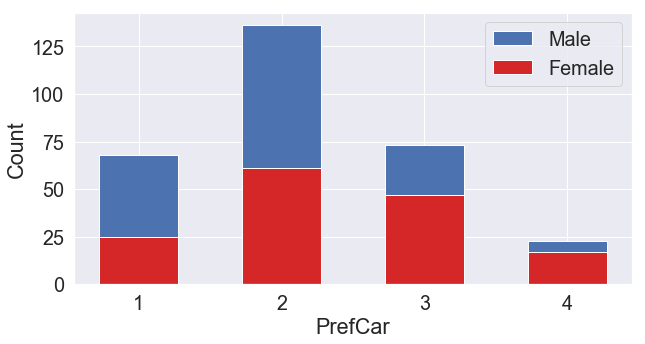

In [265]:
malecount = contingency_table.iloc[0][0:4].values
femalecount = contingency_table.iloc[1][0:4].values

fig = plt.figure(figsize=(10, 5))
sns.set(font_scale=1.8)
categories = ["1","2","3","4"]
p1 = plt.bar(categories, femalecount, 0.55, color='#d62728')
p2 = plt.bar(categories, malecount, 0.55, bottom=femalecount)
plt.legend((p2[0], p1[0]), ('Male', 'Female'))
plt.xlabel('PrefCar')
plt.ylabel('Count')
plt.show()

Как видно из графиков, для типов машин 1,2 количество выбравших мужчин и женщин примерно одинаково, тогда как для 3,4 начинают преобладать мужчины.

Отберем и сохраним наблюдаемые значения:

In [266]:
obs = np.append(contingency_table.iloc[0][0:4].values, contingency_table.iloc[1][0:4].values)
obs


array([43, 75, 26,  6, 25, 61, 47, 17], dtype=int64)

Далее сохраним ожидаемые значения и посчитаем ожидаемые частоты: 

In [267]:
row_sums = contingency_table.iloc[0:2,4].values
row_sums

array([150, 150], dtype=int64)

In [268]:
col_sums = contingency_table.iloc[2,0:4].values
col_sums

array([ 68, 136,  73,  23], dtype=int64)

In [269]:
total = contingency_table.loc['All', 'All']
total

300

In [270]:
expected = []
for j in range(2):
    for i in col_sums:
        expected.append(i*row_sums[j]/total)

expected

[34.0, 68.0, 36.5, 11.5, 34.0, 68.0, 36.5, 11.5]

Подставим в формулу:
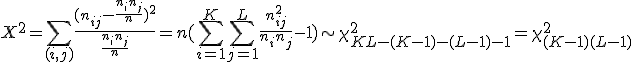

Также посчитаем количество степеней свободы.

In [271]:
chi_squared_statistic = ((obs - expected)**2 / expected).sum()
print('Chi-squared Statistic: {}'.format(chi_squared_statistic))


dof = (len(row_sums)-1)*(len(col_sums)-1)
print("Degrees of Freedom: {}".format(dof))

Chi-squared Statistic: 17.507847808569526
Degrees of Freedom: 3


Используя табличное значение для p-value = 0.05, со степенями свободы 3 значение статистики будет равно 7.815.

Так как полученное нами значение больше чем табличное, ты мы не можем принять нулевую гипотезу.

Проверим при помощи scipy.stats полученные вычисления.

In [273]:
obs = np.array([contingency_table.iloc[0][0:4].values,
                  contingency_table.iloc[1][0:4].values])

print (st.chi2_contingency(obs)[0:3])

(17.507847808569526, 0.0005555699275518034, 3)


Заключение.
Т.к. p-value < 0.05 то нельзя принять нулевую гипотезу, результаты говорят о том, что есть взаимосвязь между полом и типом выбираемого автотранспорта..